# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Вам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведите исследовательский анализ данных и установите параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

**Описание данных**

*airports_nearest* — расстояние до ближайшего аэропорта в метрах (м)  
*balcony* — число балконов  
*ceiling_height* — высота потолков (м)  
*cityCenters_nearest* — расстояние до центра города (м)  
*days_exposition* — сколько дней было размещено объявление (от публикации до снятия)  
*first_day_exposition* — дата публикации  
*floor* — этаж    
*floors_total* — всего этажей в доме  
*is_apartment* — апартаменты (булев тип)  
*kitchen_area* — площадь кухни в квадратных метрах (м²)  
*last_price* — цена на момент снятия с публикации  
*living_area* — жилая площадь в квадратных метрах (м²)  
*locality_name* — название населённого пункта  
*open_plan* — свободная планировка (булев тип)  
*parks_around3000* — число парков в радиусе 3 км  
*parks_nearest* — расстояние до ближайшего парка (м)  
*ponds_around3000* — число водоёмов в радиусе 3 км  
*ponds_nearest* — расстояние до ближайшего водоёма (м)  
*rooms* — число комнат  
*studio* — квартира-студия (булев тип)  
*total_area* — общая площадь квартиры в квадратных метрах (м²)  
*total_images* — число фотографий квартиры в объявлении  

### Изучение общей информации по файлу с данными

In [1]:
#подключим необходимые библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
#откроем файл 
df=pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [3]:
# выведем первые и последние 5 строк
display(df.head(10), df.tail(10))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
23689,13,3550000.0,35.30,2018-02-28T00:00:00,1,2.86,15.0,16.3,4,NaN,...,9.10,2.0,Санкт-Петербург,17284.0,16081.0,1.0,353.0,2.0,652.0,29.0
23690,3,5500000.0,52.00,2018-07-19T00:00:00,2,NaN,5.0,31.0,2,NaN,...,6.00,NaN,Санкт-Петербург,20151.0,6263.0,1.0,300.0,0.0,NaN,15.0
23691,11,9470000.0,72.90,2016-10-13T00:00:00,2,2.75,25.0,40.3,7,NaN,...,10.60,1.0,Санкт-Петербург,19424.0,4489.0,0.0,NaN,1.0,806.0,519.0
23692,2,1350000.0,30.00,2017-07-07T00:00:00,1,NaN,5.0,17.5,4,NaN,...,6.00,NaN,Тихвин,NaN,NaN,NaN,NaN,NaN,NaN,413.0
23693,9,4600000.0,62.40,2016-08-05T00:00:00,3,2.60,9.0,40.0,8,NaN,...,8.00,0.0,Петергоф,45602.0,34104.0,1.0,352.0,1.0,675.0,239.0
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0
23698,4,1350000.0,32.30,2017-07-21T00:00:00,1,2.50,5.0,12.3,1,NaN,...,9.00,NaN,поселок Новый Учхоз,NaN,NaN,NaN,NaN,NaN,NaN,NaN


*В таблице присутствуют пропущенные значения*

In [4]:
#выведем общую информацию о датафрейме
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

*В названии 3-х столбцов есть недочёты, также есть некорректные определенные типы данных, например "first_day_exposition", "is_apartment"*

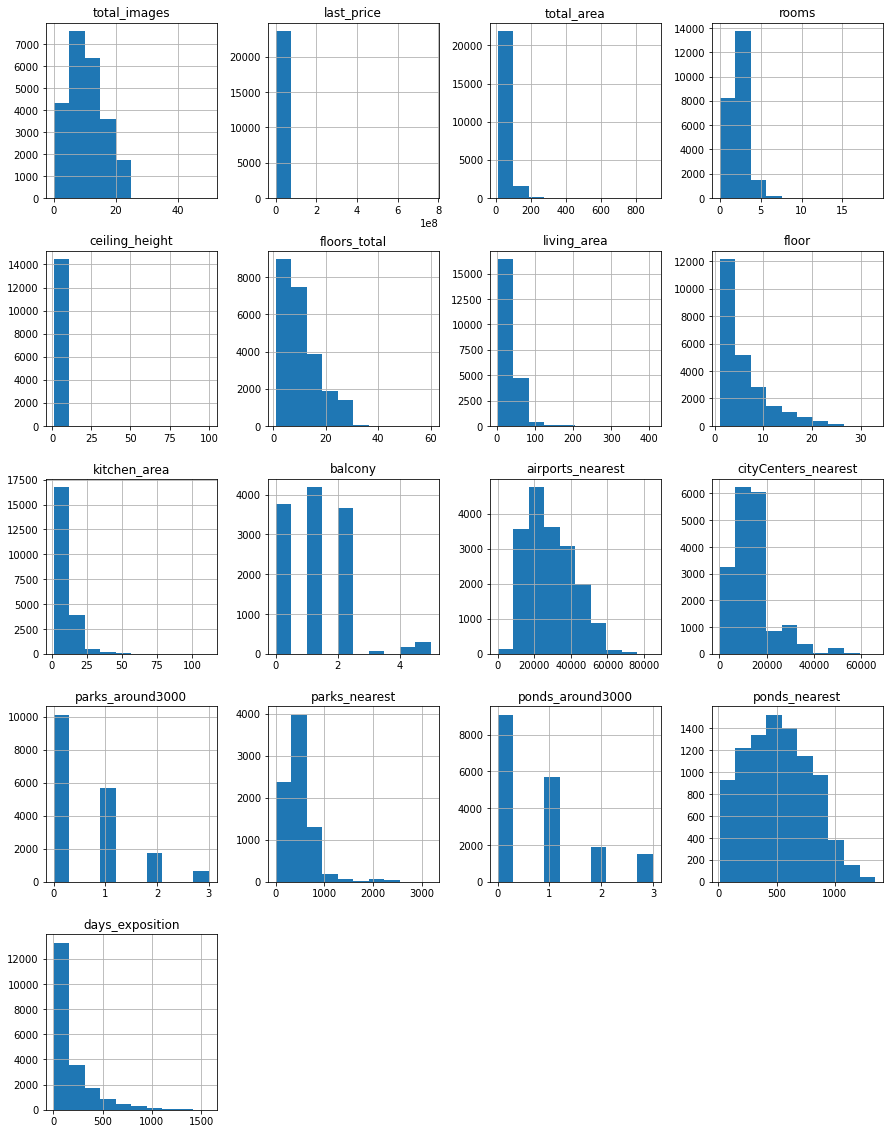

In [5]:
#построим гистограмму для всех числовых столбцов таблицы на одном графике:
df.hist(figsize=(15, 20))
plt.show()

*По гистограммам видна структура каждого столбца. В значениях столцов "floor", "days_exposition", "parks_nearest" есть выбросы данных.*

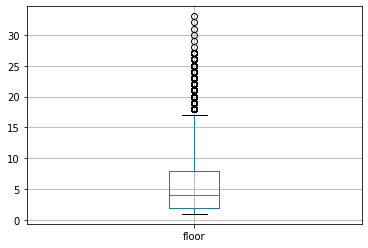

In [6]:
#постороим три диаграммы размаха:
df.boxplot(['floor'])
plt.show()

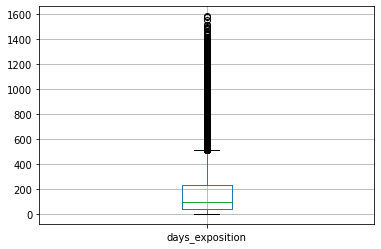

In [7]:
df.boxplot(['days_exposition'])
plt.show()

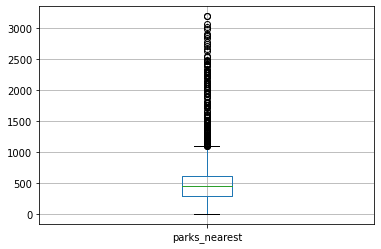

In [8]:
df.boxplot(['parks_nearest'])
plt.show()

In [9]:
#Посмотрим основные характеристики фатафрейма
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_images,23699.0,9.858475e+00,5.682529e+00,0.0,6.00,9.00,14.0,50.0
last_price,23699.0,6.541549e+06,1.088701e+07,12190.0,3400000.00,4650000.00,6800000.0,763000000.0
total_area,23699.0,6.034865e+01,3.565408e+01,12.0,40.00,52.00,69.9,900.0
rooms,23699.0,2.070636e+00,1.078405e+00,0.0,1.00,2.00,3.0,19.0
ceiling_height,14504.0,2.771499e+00,1.261056e+00,1.0,2.52,2.65,2.8,100.0
floors_total,23613.0,1.067382e+01,6.597173e+00,1.0,5.00,9.00,16.0,60.0
living_area,21796.0,3.445785e+01,2.203045e+01,2.0,18.60,30.00,42.3,409.7
floor,23699.0,5.892358e+00,4.885249e+00,1.0,2.00,4.00,8.0,33.0
kitchen_area,21421.0,1.056981e+01,5.905438e+00,1.3,7.00,9.10,12.0,112.0
balcony,12180.0,1.150082e+00,1.071300e+00,0.0,0.00,1.00,2.0,5.0


*Из общей массы выделяются данные с нулевым количеством комнат и максимальным значением -19 шт., с максимальным сроком размещения объявлений (более 4-х лет), максимальной площадью кухни (112 м), максимальной высотой потолка(100 м).*

### Предобработка данных

In [10]:
#переименуем названия трех столбцов:
df.rename(columns = {'cityCenters_nearest':'city_centers_nearest','parks_around3000':'parks_around_3000', 'ponds_around3000': 'ponds_around_3000'}, inplace = True )

In [11]:
#проверка переименования столбцов
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [12]:
#посмотрим количество пропущенных значений:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around_3000        5518
parks_nearest           15620
ponds_around_3000        5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [13]:
#проверим количество пропусков в %
pd.DataFrame(round(df.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,39.000000
floors_total,0.000000
living_area,8.000000
floor,0.000000
is_apartment,88.000000


In [14]:
# пропущенные значение высоты потолков заменим на медианное значение
df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].median())

In [15]:
# пропущенные значения апартаментов заполним исходя из логики, если поле пустое - 
# значит квартира не является апартаментами (значение = False)
df['is_apartment']=df['is_apartment'].fillna(False)

In [16]:
# пропущенные значения наличия балконов заполним исходя из логики, если поле пустое - 
# значит в квартире нет балконов (значение = 0)
df['balcony'] = df['balcony'].fillna(0)

In [17]:
#пропущенные значения в названии населенного пункта заменим на "unknown"
df['locality_name'] = df['locality_name'].fillna('unknown')

*Столбцы "floors_total', "living_area", "kitchen_area", "locality_name" имеют небольшую долю пропусков, поэтому их можно оставить в исходном виде. Пропущенная информация, которая должна была быть заполнена автоматически на основе картографических данных ("airports_nearest", "parks_around_3000", "ponds_around_3000"), а также пропущенные данные по столбцу "days_exposition" будут оставлены в исходном виде, т.к. не вляют на ход исследования. Пропущенные картографические данные могут свидетельствовать о технических проблемах работы формы для заполнения объявлений.*

In [18]:
# проверка значений, по которым удалось заполнить пропуски
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               86
living_area              1903
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name               0
airports_nearest         5542
city_centers_nearest     5519
parks_around_3000        5518
parks_nearest           15620
ponds_around_3000        5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [19]:
#выведем типы данных по столбцам для внесения корректировок
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        23699 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23699 non-null  object 
 15  airports_nearest   

*Выделим столбцы, в которых необходимо изменить тип данных:  
"last_price", "balcony" -  изменим тип на целочислоенный, т.к. текущая точность не требуется;  
"first_day_exposition" - изменим тип данных на дата, т.к. дальнейшем анализе на шаге 3 потребуется отдельно проработать информацию по дням недели, мясяцу и году публикации каждого объявления;  
"floors_total", "days_exposition" - тип данных изменить на целочисленный не получится, т.к. заполнены не все значения*

In [20]:
df['last_price']=df['last_price'].astype('int')
df['balcony']=df['balcony'].astype('int')

In [21]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y.%m.%dT%H:%M:%S')

In [22]:
#проверим изменения типа данных в столбцах
df[['last_price', 'balcony','first_day_exposition']].dtypes

last_price                       int64
balcony                          int64
first_day_exposition    datetime64[ns]
dtype: object

In [23]:
# приведем названия населенных пунктов к нижнему регистру
df['locality_name'] = df['locality_name'].str.lower()

In [24]:
#изучим уникальные значения в столбце с названиями населенных пунктов
df['locality_name'].sort_values().unique()

array(['unknown', 'бокситогорск', 'волосово', 'волхов', 'всеволожск',
       'выборг', 'высоцк', 'гатчина', 'городской поселок большая ижора',
       'городской поселок янино-1', 'городской посёлок будогощь',
       'городской посёлок виллози', 'городской посёлок лесогорский',
       'городской посёлок мга', 'городской посёлок назия',
       'городской посёлок новоселье', 'городской посёлок павлово',
       'городской посёлок рощино', 'городской посёлок свирьстрой',
       'городской посёлок советский', 'городской посёлок фёдоровское',
       'городской посёлок янино-1', 'деревня агалатово', 'деревня аро',
       'деревня батово', 'деревня бегуницы', 'деревня белогорка',
       'деревня большая вруда', 'деревня большая пустомержа',
       'деревня большие колпаны', 'деревня большое рейзино',
       'деревня большой сабск', 'деревня бор', 'деревня борисова грива',
       'деревня ваганово', 'деревня вартемяги', 'деревня вахнова кара',
       'деревня выскатка', 'деревня гарболово', 'дер

In [25]:
#проверим количество уникальных значений в столбце с названиями населенных пунктов
print(len(df['locality_name'].unique()))

365


In [26]:
# устраним неявные дубликаты в названиях населенных пунктов
df['locality_name'] = (
    df['locality_name']
    .str.replace('ё','е')
    .replace(['городской поселок ','поселок ', 'поселок городского типа ', 'коттеджный поселок '], 'поселок ', regex=True)
)

In [27]:
# проверим результат визуально
df['locality_name'].sort_values().unique()

array(['unknown', 'бокситогорск', 'волосово', 'волхов', 'всеволожск',
       'выборг', 'высоцк', 'гатчина', 'деревня агалатово', 'деревня аро',
       'деревня батово', 'деревня бегуницы', 'деревня белогорка',
       'деревня большая вруда', 'деревня большая пустомержа',
       'деревня большие колпаны', 'деревня большое рейзино',
       'деревня большой сабск', 'деревня бор', 'деревня борисова грива',
       'деревня ваганово', 'деревня вартемяги', 'деревня вахнова кара',
       'деревня выскатка', 'деревня гарболово', 'деревня глинка',
       'деревня горбунки', 'деревня гостилицы', 'деревня заклинье',
       'деревня заневка', 'деревня зимитицы', 'деревня извара',
       'деревня иссад', 'деревня калитино', 'деревня кальтино',
       'деревня камышовка', 'деревня каськово', 'деревня келози',
       'деревня кипень', 'деревня кисельня', 'деревня колтуши',
       'деревня коркино', 'деревня котлы', 'деревня кривко',
       'деревня кудрово', 'деревня кузьмолово', 'деревня курковицы',


In [28]:
# проверим итоговое количество уникальных значений
print(len(df['locality_name'].unique()))

322


In [29]:
#проверим датафрейм на наличие дубликатов
df.duplicated().sum()

0

*Дубликатов в датафреме нет*

In [30]:
#выведем аномальные значения в данных для высоты потолков
df.query('ceiling_height >= 20')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
355,17,3600000,55.2,2018-07-12,2,25.0,5.0,32.0,2,False,...,NaN,2,гатчина,NaN,NaN,NaN,NaN,NaN,NaN,259.0
3148,14,2900000,75.0,2018-11-12,3,32.0,3.0,53.0,2,False,...,8.0,0,волхов,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4643,0,4300000,45.0,2018-02-01,2,25.0,9.0,30.0,2,False,...,7.0,1,санкт-петербург,12016.0,13256.0,1.0,658.0,1.0,331.0,181.0
4876,7,3000000,25.0,2017-09-27,0,27.0,25.0,17.0,17,False,...,NaN,2,поселок мурино,NaN,NaN,NaN,NaN,NaN,NaN,28.0
5076,0,3850000,30.5,2018-10-03,1,24.0,5.0,19.5,1,True,...,5.5,0,санкт-петербург,29686.0,8389.0,3.0,397.0,1.0,578.0,7.0
5246,0,2500000,54.0,2017-10-13,2,27.0,5.0,30.0,3,False,...,9.0,2,деревня мины,NaN,NaN,NaN,NaN,NaN,NaN,540.0
5669,4,4400000,50.0,2017-08-08,2,26.0,9.0,21.3,3,False,...,7.0,2,санкт-петербург,28981.0,10912.0,1.0,305.0,0.0,NaN,267.0
5807,17,8150000,80.0,2019-01-09,2,27.0,36.0,41.0,13,False,...,12.0,5,санкт-петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,38.0
6246,6,3300000,44.4,2019-03-25,2,25.0,5.0,31.3,5,False,...,5.7,0,кронштадт,68923.0,50649.0,1.0,417.0,2.0,73.0,NaN
9379,5,3950000,42.0,2017-03-26,3,25.0,5.0,30.0,2,False,...,5.2,0,санкт-петербург,11647.0,13581.0,0.0,NaN,0.0,NaN,NaN


In [31]:
#Ошибки простановки точки в значениях высоты потолка необходимо исправить:
df.loc[df['ceiling_height'] >= 20.0, 'ceiling_height'] = df['ceiling_height']/10

In [32]:
# сделаем проверку
df.query('ceiling_height >= 20')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition


**В результате выполненной предобработки данных были сделаны следующие операции:**  
    - приведены наименования столбцов к единому стилю;  
    - заполнены явные и необходимые для дальнейшего анализа пропуски данных;  
    - в некоторых столбцах изменены типы данных;  
    - устранены неявные дубликаты в столбце "locality_name";  
    - данные проверены на наличие дубликатов вцелом;  
    - обработаны аномальные значения столбца "ceiling_height".
    
    

### Добавление в таблицу новых столбцов

*Расчитаем цену одного квадратного метра, с круглением до двух знаков после запятой*

In [33]:
df['price_one_qm']= round(df['last_price']/df['total_area'],2)

In [34]:
#проверим расчетные данные по цене квадратного метра
df['price_one_qm'].head(10)

0    120370.37
1     82920.79
2     92785.71
3    408176.10
4    100000.00
5     95065.79
6     99195.71
7    110544.69
8     87454.76
9     88524.59
Name: price_one_qm, dtype: float64

*Добавим день недели, месяц и год публикации объявления*

In [35]:
df['weekday'] = df['first_day_exposition'].dt.weekday
df['month'] = df['first_day_exposition'].dt.month
df['year'] = df['first_day_exposition'].dt.year

In [36]:
# проверим вывод дат
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_one_qm,weekday,month,year
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,16028.0,1.0,482.0,2.0,755.0,NaN,120370.37,3,3,2019
1,7,3350000,40.4,2018-12-04,1,2.65,11.0,18.6,1,False,...,18603.0,0.0,NaN,0.0,NaN,81.0,82920.79,1,12,2018
2,10,5196000,56.0,2015-08-20,2,2.65,5.0,34.3,4,False,...,13933.0,1.0,90.0,2.0,574.0,558.0,92785.71,3,8,2015
3,0,64900000,159.0,2015-07-24,3,2.65,14.0,NaN,9,False,...,6800.0,2.0,84.0,3.0,234.0,424.0,408176.10,4,7,2015
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,8098.0,2.0,112.0,1.0,48.0,121.0,100000.00,1,6,2018


*Обозначим тип этажа квартиры исходя из значений: "первый", "последний", "другой"*

In [37]:
# Создаём функцию для заполнения нового столбца с типом этажа
def floor_group(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
df['floor_type'] = df.apply(floor_group, axis=1)

In [38]:
# проверим вывод 
df['floor_type'].value_counts()

другой       17446
последний     3336
первый        2917
Name: floor_type, dtype: int64

*Добавим столбец с расстоянием до центра города в километрах*

In [39]:
df['city_centers_nearest_km'] = (df['city_centers_nearest'] / 1000).round(0)

In [40]:
#проверим вывод данных о расстоянии до центар в км
df.head(30)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_one_qm,weekday,month,year,floor_type,city_centers_nearest_km
0,20,13000000,108.00,2019-03-07,3,2.70,16.0,51.00,8,False,...,482.0,2.0,755.0,NaN,120370.37,3,3,2019,другой,16.0
1,7,3350000,40.40,2018-12-04,1,2.65,11.0,18.60,1,False,...,NaN,0.0,NaN,81.0,82920.79,1,12,2018,первый,19.0
2,10,5196000,56.00,2015-08-20,2,2.65,5.0,34.30,4,False,...,90.0,2.0,574.0,558.0,92785.71,3,8,2015,другой,14.0
3,0,64900000,159.00,2015-07-24,3,2.65,14.0,NaN,9,False,...,84.0,3.0,234.0,424.0,408176.10,4,7,2015,другой,7.0
4,2,10000000,100.00,2018-06-19,2,3.03,14.0,32.00,13,False,...,112.0,1.0,48.0,121.0,100000.00,1,6,2018,другой,8.0
5,10,2890000,30.40,2018-09-10,1,2.65,12.0,14.40,5,False,...,NaN,NaN,NaN,55.0,95065.79,0,9,2018,другой,NaN
6,6,3700000,37.30,2017-11-02,1,2.65,26.0,10.60,6,False,...,NaN,0.0,NaN,155.0,99195.71,3,11,2017,другой,19.0
7,5,7915000,71.60,2019-04-18,2,2.65,24.0,NaN,22,False,...,NaN,0.0,NaN,NaN,110544.69,3,4,2019,другой,12.0
8,20,2900000,33.16,2018-05-23,1,2.65,27.0,15.43,26,False,...,NaN,NaN,NaN,189.0,87454.76,2,5,2018,другой,NaN
9,18,5400000,61.00,2017-02-26,3,2.50,9.0,43.60,7,False,...,NaN,0.0,NaN,289.0,88524.59,6,2,2017,другой,15.0


In [41]:
df['city_centers_nearest_km'].value_counts().sum()

18180

In [42]:
#выведем информацию о датафрейме с учетом новых добавленных столбцов
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   total_images             23699 non-null  int64         
 1   last_price               23699 non-null  int64         
 2   total_area               23699 non-null  float64       
 3   first_day_exposition     23699 non-null  datetime64[ns]
 4   rooms                    23699 non-null  int64         
 5   ceiling_height           23699 non-null  float64       
 6   floors_total             23613 non-null  float64       
 7   living_area              21796 non-null  float64       
 8   floor                    23699 non-null  int64         
 9   is_apartment             23699 non-null  bool          
 10  studio                   23699 non-null  bool          
 11  open_plan                23699 non-null  bool          
 12  kitchen_area             21421 n

**Для дальнейшего анализа данных в исходный датафрейм были добавлены новые столбцы: цена одного квадратного метра, день, месяц, год публикации объявления, тип этажа квартиры, расстояние до центра города в километрах.**

Следует отметить, что в столбце "floor_type" для 86 строк категория этажа могла определиться неверно (вместо "последний" определился как тип "другой"), т.к. значения общего количества этажей для этих объектов отсутствуют. Учитывая то, что доля возможных ошибок крайне мала, на результаты исследования они не повлияют.  
Данные о расстоянии до центра города в километрах были расчитаны только для аналогичных непустых значений в метрах

### Проведение исследовательского анализа данных

*Изучим значение общей площади квартир в квадратных метрах*

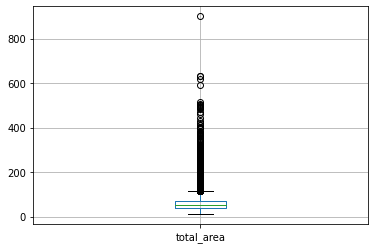

In [43]:
#построим диаграмму размаха
df.boxplot(['total_area'])
plt.show()

In [44]:
#отразим числовое описание данных
df['total_area'].describe().T

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

In [45]:
#расчитаем межквартильный размах
q1 = df['total_area'].quantile(0.25)
q3 = df['total_area'].quantile(0.75)
iqr=q3-q1
print (iqr)

29.900000000000006


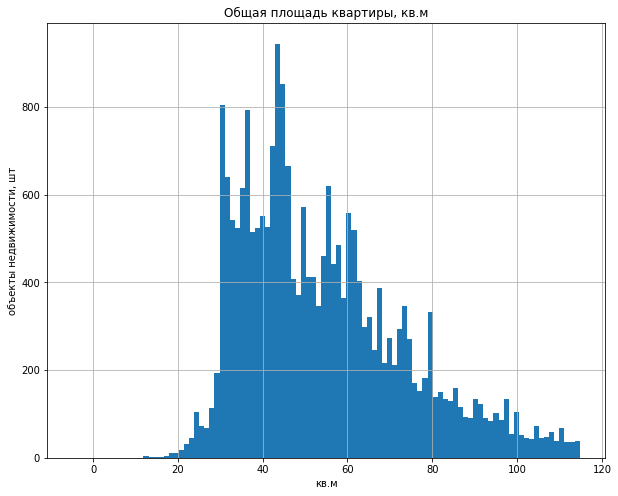

In [46]:
#построим гистограмму, исключая выбросы в данных по общей площади квартир
df['total_area'].hist(bins=100, range=((q1 - 1.5 * iqr), (q3 + 1.5 * iqr)), figsize=(10, 8), grid =True)
plt.title('Общая площадь квартиры, кв.м')
plt.xlabel('кв.м')
plt.ylabel('объекты недвижимости, шт')
plt.show()

*С учетом отфильтрованных выбросов, можно сказать, что бОльшая часть квартир имеет метраж от 30 до 60 кв.м, наибольшее количество квартир с метражом около 43 кв.м, медианное значение - 52 кв. м*

*Изучим значение жилой площади квартир в квадратных метрах*

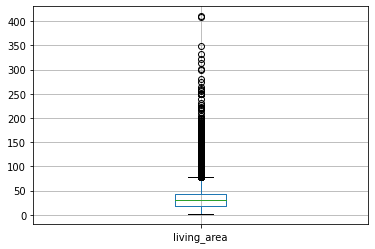

In [47]:
#построим диаграмму размаха
df.boxplot(['living_area'])
plt.show()

In [48]:
#отразим числовое описание данных
df['living_area'].describe().T

count    21796.000000
mean        34.457852
std         22.030445
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

In [49]:
#расчитаем межквартильный размах
q1_la = df['living_area'].quantile(0.25)
q3_la = df['living_area'].quantile(0.75)
iqr_la=q3_la-q1_la
print (iqr_la)

23.699999999999996


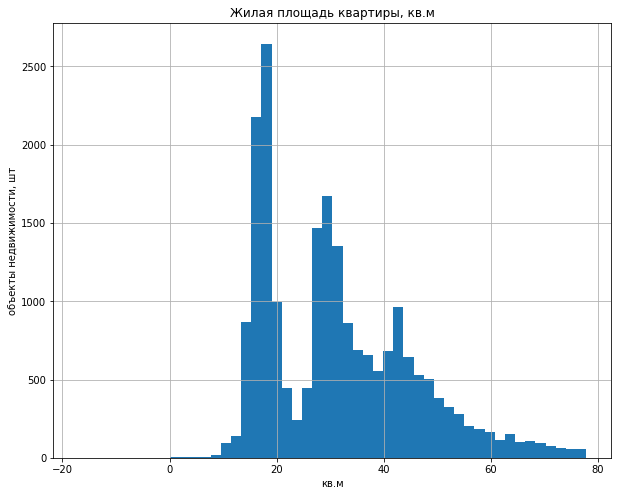

In [50]:
#построим гистограмму, исключая выбросы в данных по жилой площади квартир
df['living_area'].hist(bins=50, range=((q1_la - 1.5 * iqr_la), (q3_la + 1.5 * iqr_la)), figsize=(10, 8), grid =True)
plt.title('Жилая площадь квартиры, кв.м')
plt.xlabel('кв.м')
plt.ylabel('объекты недвижимости, шт')
plt.show()

*С учетом отфильтрованных выбросов, можно сказать, что бОльшая часть квартир имеет метраж жилой площади от 18 до 55 кв.м, наибольшее количество квартир с метражом около 18 кв.м, медианное значение - 30 кв. м*

*Изучим значение площади кухни в квадратных метрах*

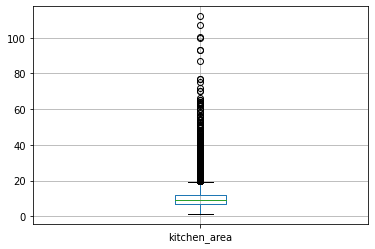

In [51]:
#построим диаграмму размаха
df.boxplot(['kitchen_area'])
plt.show()

In [52]:
#отразим числовое описание данных
df['kitchen_area'].describe().T

count    21421.000000
mean        10.569807
std          5.905438
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

In [53]:
#расчитаем межквартильный размах
q1_ka = df['kitchen_area'].quantile(0.25)
q3_ka = df['kitchen_area'].quantile(0.75)
iqr_ka=q3_ka-q1_ka
print (iqr_ka)

5.0


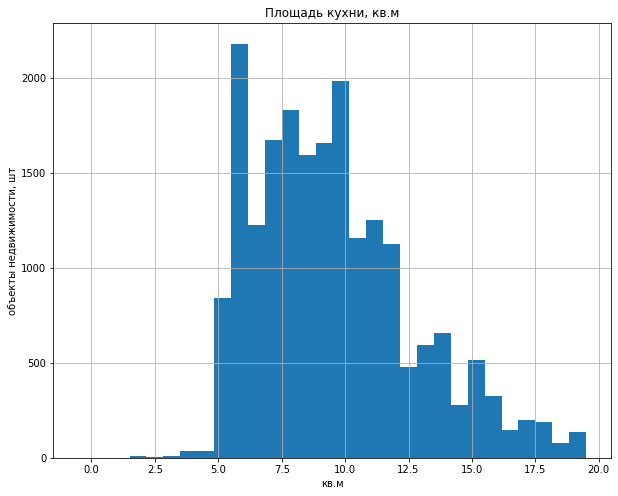

In [54]:
#построим гистограмму, исключая выбросы в данных по площади кухонь
df['kitchen_area'].hist(bins=30, range=((q1_ka - 1.5 * iqr_ka), (q3_ka + 1.5 * iqr_ka)), figsize=(10, 8), grid =True)
plt.title('Площадь кухни, кв.м')
plt.xlabel('кв.м')
plt.ylabel('объекты недвижимости, шт')
plt.show()

*С учетом отфильтрованных выбросов, можно сказать, что бОльшая часть квартир имеет метраж кухни от 5,5 до 12 кв.м, наибольшее количество квартир имеет кухню с метражом около 6 кв.м, медианное значение - 9,1 кв. м*

*Изучим цену объекта недвижимости на момент снятия с публикации*

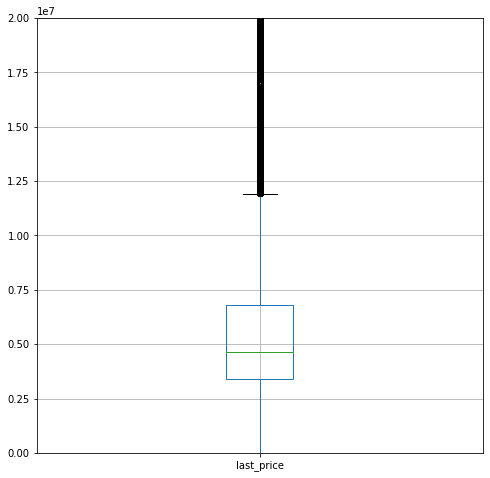

In [55]:
#построим диаграмму размаха
df.boxplot(['last_price'], figsize=(8,8))
plt.ylim(0, 0.2e8)
plt.show()

In [56]:
#отразим числовое описание данных
df['last_price'].describe().T

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

In [57]:
#расчитаем межквартильный размах
q1_lp = df['last_price'].quantile(0.25)
q3_lp = df['last_price'].quantile(0.75)
iqr_lp=q3_lp-q1_lp
print (iqr_lp)

3400000.0


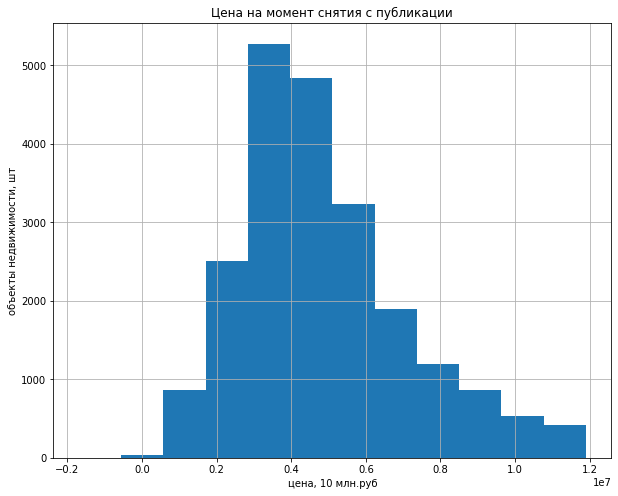

In [58]:
#построим гистограмму, исключая выбросы в данных 
df['last_price'].hist(bins=12, range=((q1_lp - 1.5 * iqr_lp), (q3_lp + 1.5 * iqr_lp)), figsize=(10, 8), grid =True)
plt.title('Цена на момент снятия с публикации')
plt.xlabel('цена, 10 млн.руб')
plt.ylabel('объекты недвижимости, шт')
plt.show()

*С учетом исключения выбивающихся значений, диапазон цен на квартиры в основном лежит в границах от 3 до 5 млн.руб, медианное значение равно 4.65 млн.руб.*

*Изучим показатель числа комнат в размещенных объявлениях о продаже квартир*

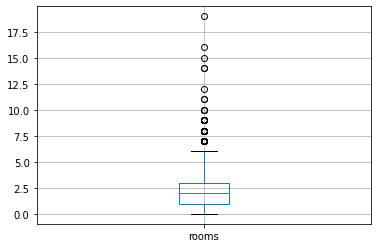

In [59]:
#построим диаграмму размаха
df.boxplot(['rooms'])
plt.show()

In [60]:
#отразим числовое описание данных
df['rooms'].describe().T

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

In [61]:
#расчитаем межквартильный размах
q1_r = df['rooms'].quantile(0.25)
q3_r = df['rooms'].quantile(0.75)
iqr_r=q3_r-q1_r
print (iqr_r)

2.0


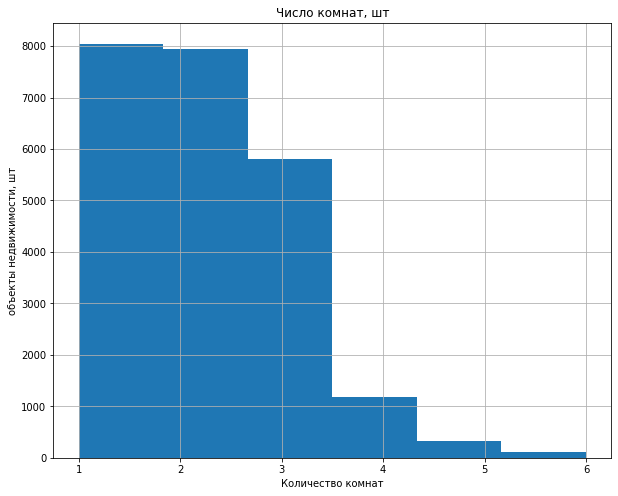

In [62]:
#построим гистограмму, исключая выбросы в данных 
df['rooms'].hist(bins=6, range=(1, (q3_r + 1.5 * iqr_r)), figsize=(10, 8), grid =True)
plt.title('Число комнат, шт')
plt.xlabel('Количество комнат')
plt.ylabel('объекты недвижимости, шт')
plt.show()

*Основная масса объявлений и продаже квартир имеет 1-2 комнаты. Из анализа были исключены выбросы (квартиры с более чем 6-ю комнатами), а также объявления, где было указано 0 комнат, т.к. данная информация явно ошибочная. Также следует отметить динамику - с увеличением количества комнат количество размещенных объявлений сокращается*

*Изучим показатель высоты потолков. Ранее в датафрейме были исправлены аномальные значения (с высотой более 20 м)*

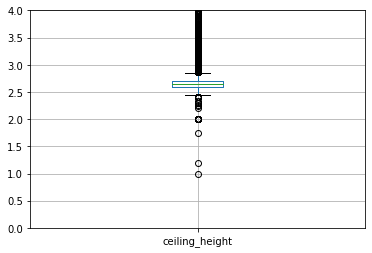

In [63]:
#построим диаграмму размаха
df.boxplot(['ceiling_height'])
plt.ylim(0, 4)
plt.show()

In [64]:
#отразим числовое описание данных
df['ceiling_height'].describe().T

count    23699.000000
mean         2.698721
std          0.253208
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max         14.000000
Name: ceiling_height, dtype: float64

In [65]:
#расчитаем межквартильный размах
q1_ch = df['ceiling_height'].quantile(0.25)
q3_ch = df['ceiling_height'].quantile(0.75)
iqr_ch=q3_ch-q1_ch
print (iqr_ch)

0.10000000000000009


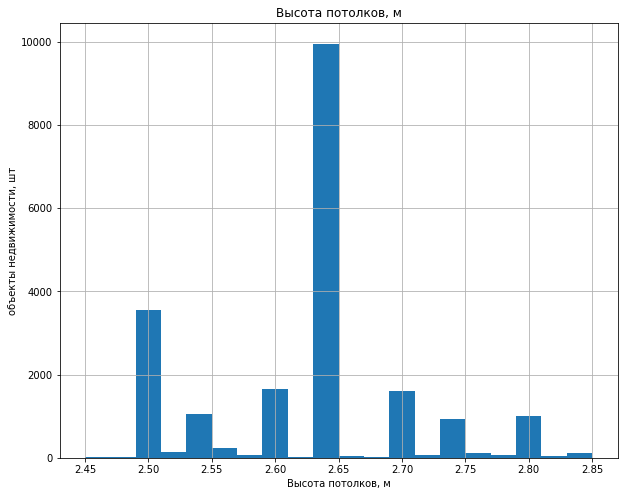

In [66]:
#построим гистограмму, исключая выбросы в данных 
df['ceiling_height'].hist(bins=20, range=((q1_ch - 1.5 * iqr_ch), (q3_ch + 1.5 * iqr_ch)), figsize=(10, 8), grid =True)
plt.title('Высота потолков, м')
plt.xlabel('Высота потолков, м')
plt.ylabel('объекты недвижимости, шт')
plt.show()

*В данных о высоте потолков, с учетом обработанных аномальных значений и исключения редких и выбивающихся значений, высота варьируется от 2,45 м до 2,85 м. Наибольшее количество квартир имеет высоту потолка около 2,65 м., далее - квартиры с высотой потолка 2,5 м. Все остальные варианты высоты представлены реже.*

*Проведем анализ данных по типу этажа квартиры в соотвествии с созданной группировкой -  первый, последний, другой*

In [67]:
# выведем количество уникальных значений по категориям
df['floor_type'].value_counts()

другой       17446
последний     3336
первый        2917
Name: floor_type, dtype: int64

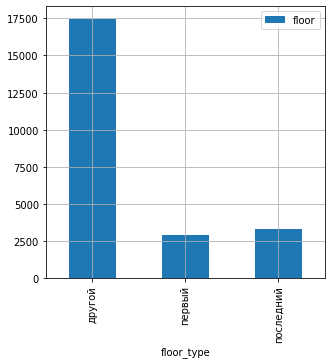

In [68]:
#постороим гистограмму
df.pivot_table(index='floor_type', values='floor', aggfunc='count').plot(kind='bar', grid=True, figsize=(5,5))
plt.show()

*По исследуемым данным видно, что основную долю объявлений о продаже составляют квартиры, расположенные не на крайних этажах*

*Изучим данные об общем количестве этажей в доме*

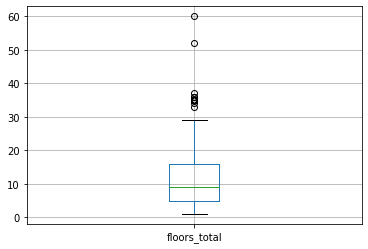

In [69]:
#построим диаграмму размаха
df.boxplot(['floors_total'])
plt.show()

In [70]:
#отразим числовое описание данных
df['floors_total'].describe().T

count    23613.000000
mean        10.673824
std          6.597173
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

In [71]:
#расчитаем межквартильный размах
q1_ft = df['floors_total'].quantile(0.25)
q3_ft = df['floors_total'].quantile(0.75)
iqr_ft=q3_ft-q1_ft
print (iqr_ft)

11.0


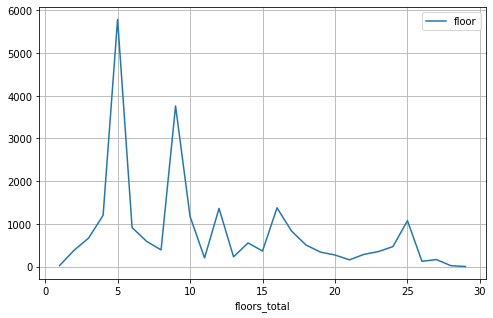

In [72]:
#построим график, исключая выбросы в данных 
(
    df.query('floors_total > 0' and 'floors_total <= (@q3_ft + 1.5 * @iqr_ft)')
    .pivot_table(index='floors_total', values='floor', aggfunc='count')
    .plot(grid=True, figsize=(8, 5))
) 
plt.show()

*По данным гистограммы очевидно, больше всего на рынке недвижимости объявлений о продаже квартир в пятиэтажных домах, далее идут квартиры в девятиэтажных домах.*

*Изучим данные по продаже квартир по параметру "расстояние до центра города в метрах". Отмечу, что поскольку изначально не все значения данного параметра были автоматически заполнены на основе картографичеких данных, то такого рода объекты недвижимости исключены из анализа*

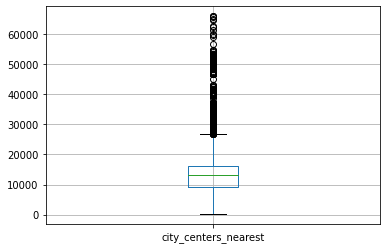

In [73]:
#построим диаграмму размаха
df.boxplot(['city_centers_nearest'])
plt.show()

In [74]:
#отразим числовое описание данных
df['city_centers_nearest'].describe().T

count    18180.000000
mean     14191.277833
std       8608.386210
min        181.000000
25%       9238.000000
50%      13098.500000
75%      16293.000000
max      65968.000000
Name: city_centers_nearest, dtype: float64

In [75]:
#расчитаем межквартильный размах
q1_ccn = df['city_centers_nearest'].quantile(0.25)
q3_ccn = df['city_centers_nearest'].quantile(0.75)
iqr_ccn=q3_ccn-q1_ccn
print (iqr_ccn)

7055.0


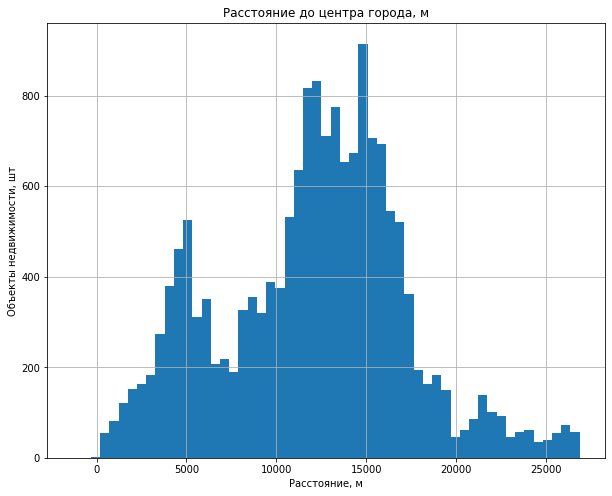

In [76]:
#построим гистограмму, исключая выбросы в данных 
df['city_centers_nearest'].hist(bins=55, range=((q1_ccn - 1.5 * iqr_ccn), (q3_ccn + 1.5 * iqr_ccn)), figsize=(10, 8), grid =True)
plt.title('Расстояние до центра города, м')
plt.xlabel('Расстояние, м')
plt.ylabel('Объекты недвижимости, шт')
plt.show()

*Таким образом, больше всего объявлений о продаже объектов недвижимости, расположенных на расстоянии 14,5 км от центра города, на втором месте квартиры, расположенные на расстоянии 12 км от центра, на третьем месте - расположенные на расстоянии 5 км от центра города*

*Оценим расстояние до ближайшего парка по тем объектам недвижимости, по которым в исходном датафрейме была заполнена информация на основе картографических данных*

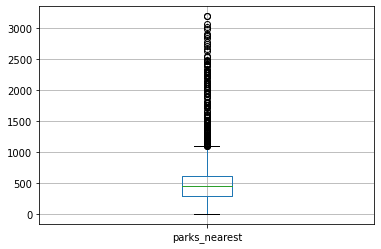

In [77]:
#построим диаграмму размаха
df.boxplot(['parks_nearest'])
plt.show()

In [78]:
#отразим числовое описание данных
df['parks_nearest'].describe().T

count    8079.000000
mean      490.804555
std       342.317995
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

In [79]:
#расчитаем межквартильный размах
q1_pn = df['parks_nearest'].quantile(0.25)
q3_pn = df['parks_nearest'].quantile(0.75)
iqr_pn=q3_pn-q1_pn
print (iqr_pn)

324.0


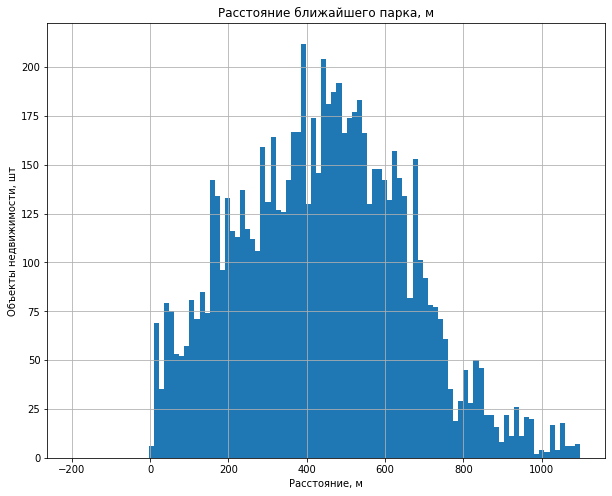

In [80]:
#построим гистограмму, исключая выбросы в данных 
df['parks_nearest'].hist(bins=100, range=((q1_pn - 1.5 * iqr_pn), (q3_pn + 1.5 * iqr_pn)), figsize=(10, 8), grid =True)
plt.title('Расстояние ближайшего парка, м')
plt.xlabel('Расстояние, м')
plt.ylabel('Объекты недвижимости, шт')
plt.show()

*Основная масса объектов недвижимости, по которым в исходном датафрейме были заполнены данные, расположена на расстоянии от 400 м до 600 м до ближайшего парка. Медианное значение - 455 м*

**Таким образом, анализ данных с учетом межквартильных размахов, показал:**  

    1) бОльшая часть квартир имеет: 
    
        - общий метраж от 30 до 60 кв.м, медианное значение - 52 кв.м.;    
        - метраж жилой площади от 18 до 55 кв.м., медианное значение - 30 кв.м.;   
        - метраж кухни от 5,5 до 12 кв.м.;  
        - 1-2 комнаты;  
        - высоту потолков от 2,45 м. до 2,85 м.;  
        
    2) диапазон цен на квартиры на момент снятия объявлений с публикации в основном лежит в границах от 3 до 5 млн.руб.;    
    3) основную долю объявлений о продаже составляют квартиры, расположенные не на крайних этажах;   
    4) больше всего объявлений о продаже квартир:
    
        - в пятиэтажных и девятиэтажных домах;  
        - расположенных на расстоянии 14,5 км. от центра города;
        - расположенных на расстоянии от 400 м. до 600 м. до ближайшего парка.

*Изучим, как быстро продавались квартиры на основании данных о количестве дней публикации объявления*

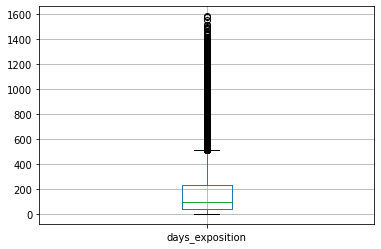

In [81]:
#построим диаграмму размаха
df.boxplot(['days_exposition'])
plt.show()

In [82]:
#отразим числовое описание данных
df['days_exposition'].describe().T

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [83]:
#расчитаем межквартильный размах
q1_de = df['days_exposition'].quantile(0.25)
q3_de = df['days_exposition'].quantile(0.75)
iqr_de=q3_de-q1_de
print (iqr_de)

187.0


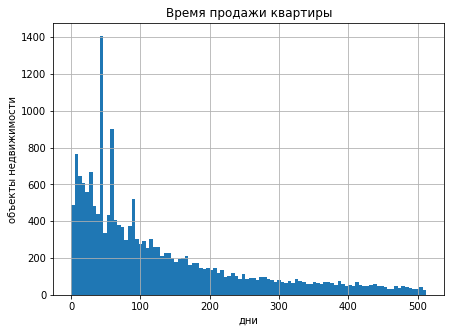

In [84]:
#построим гистограмму, исключая выбросы в данных 
df['days_exposition'].hist(bins=100, range=(0, (q3_de + 1.5 * iqr_de)), figsize=(7, 5))
plt.title('Время продажи квартиры')
plt.xlabel('дни')
plt.ylabel('объекты недвижимости')
plt.show()

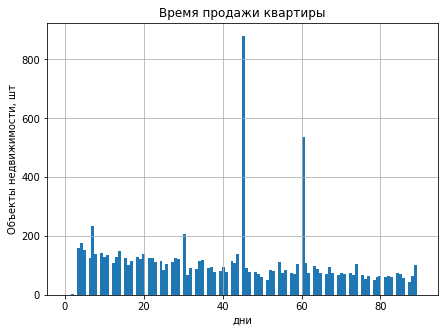

In [85]:
# рассмотрим диапазон до 90 дней более детально, т.к. в данных очевидно есть анамальные выбросы
df['days_exposition'].hist(bins=120, range=(0, 90), figsize=(7, 5))
plt.title('Время продажи квартиры')
plt.xlabel('дни')
plt.ylabel('Объекты недвижимости, шт')
plt.show()

*Значения в 45 и 60 дней необходимо исключить из анализа, т.к. это явно аномальные выбросы, возможно за счет автоматического закрытия объявлений по сроку от первоначальной даты.*

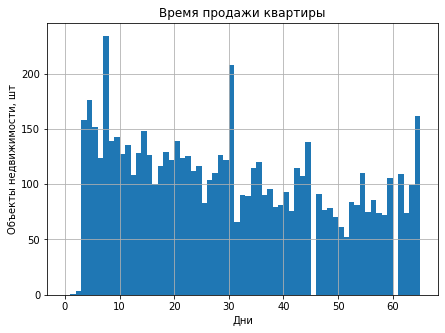

In [86]:
df[(~np.isclose(df['days_exposition'],45))&(~np.isclose(df['days_exposition'],60))]['days_exposition'].hist(bins=65, range=(0, 65), figsize=(7, 5))
plt.title('Время продажи квартиры')
plt.xlabel('Дни')
plt.ylabel('Объекты недвижимости, шт')
plt.show()

In [87]:
#расчитаем медианное значение по данным без аномальных выбросов
df[(~np.isclose(df['days_exposition'],45))&(~np.isclose(df['days_exposition'],60))]['days_exposition'].median()

108.0

In [88]:
#расчитаем среднее значение по данным без аномальных выбросов
df[(~np.isclose(df['days_exposition'],45))&(~np.isclose(df['days_exposition'],60))]['days_exposition'].mean()

190.55460732984292

In [89]:
#расчитаем  значение первого квартиля по данным без аномальных выбросов
df[(~np.isclose(df['days_exposition'],45))&(~np.isclose(df['days_exposition'],60))]['days_exposition'].quantile(0.25)

42.0

In [90]:
#расчитаем  значение третьего квартиля по данным без аномальных выбросов
df[(~np.isclose(df['days_exposition'],45))&(~np.isclose(df['days_exposition'],60))]['days_exposition'].quantile(0.75)

249.0

**Согласно медианному значению, в основном квартиры продаются в течение 108 дней. Быстрыми продажами можно считать квартиры, проданные за срок менее 42 дней (величина первого квартиля), необычно долгими продажами можно назвать объявления, которые были размещены более чем на 249 дней (величина третьего квартиля). Объявления со сроком более 600 дней были отброшены, т.к. являются выбивающимися значениями, возможно, это уже неактуальные объявления, размещаемые на сайте на основе автоматического продления.**

*Проверим, какие факторы больше всего влияют на общую (полную) стоимость объекта недвижимости: общая, жилая площадь, плащадь кухни, количество комнат, этаж расположения квартиры и дата размещения.*

*Для показателей общей  и жилой площади, площади кухни создадим вспомогательные датафреймы, учитывающие выбросы. На основании созданных датафреймов расчитаем коэффициенты корреляции между разными видами площадей и общей стоимостью объектов недвижимости*

In [91]:
df_corr_total_area=df.query('@q1 - 1.5*@iqr < total_area < @q3 + 1.5*@iqr').pivot_table(index='floor', values=['total_area', 'last_price'], aggfunc='mean')

In [92]:
print(df_corr_total_area.corr())

            last_price  total_area
last_price    1.000000    0.900567
total_area    0.900567    1.000000


In [93]:
df_corr_living_area=df.query('@q1_la - 1.5*@iqr_la < living_area < @q3_la + 1.5*@iqr_la').pivot_table(index='floor', values=['living_area', 'last_price'], aggfunc='mean')

In [94]:
print(df_corr_living_area.corr())

             last_price  living_area
last_price     1.000000     0.747644
living_area    0.747644     1.000000


In [95]:
df_corr_kitchen_area=df.query('@q1_ka - 1.5*@iqr_ka < kitchen_area < @q3_ka + 1.5*@iqr_ka').pivot_table(index='floor', values=['kitchen_area', 'last_price'], aggfunc='mean')

In [96]:
print(df_corr_kitchen_area.corr())

              kitchen_area  last_price
kitchen_area      1.000000    0.318489
last_price        0.318489    1.000000


In [97]:
#расчитаем коэффициент корреляции между общей площадью и стоимостью объектов недвижимости
df['total_area'].corr(df['last_price'])

0.6536750579657242

In [98]:
#расчитаем коэффициент корреляции между жилой площадью и стоимостью объектов недвижимости
df['living_area'].corr(df['last_price'])

0.5664915336952651

In [99]:
#расчитаем коэффициент корреляции между площадью кухни и стоимостью объектов недвижимости
df['kitchen_area'].corr(df['last_price'])

0.5198690130216392

*Очевидно, что на стоимость объектов недвижимости размер общей площади вляет больше, чем параметр жилой плащади или площадь кухни*

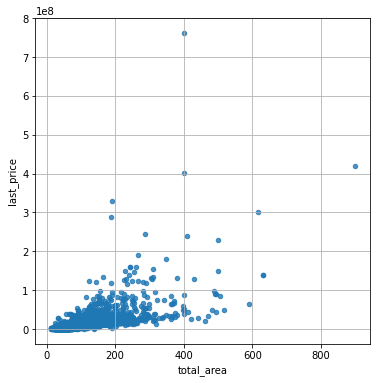

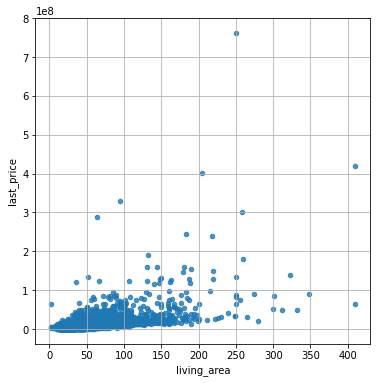

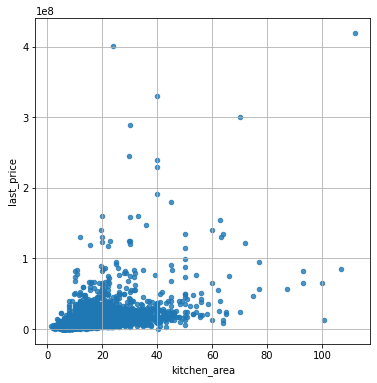

In [101]:
df.plot(x='total_area', y='last_price', kind='scatter', alpha=0.8, figsize=(6, 6), sharex=False, grid=True) 
plt.show()

df.plot(x='living_area', y='last_price', kind='scatter', alpha=0.8, figsize=(6, 6), sharex=False, grid=True) 
plt.show()

df.plot(x='kitchen_area', y='last_price', kind='scatter', alpha=0.8, figsize=(6, 6), sharex=False, grid=True) 
plt.show()


*По рассмотренным на данном этапе параметрам можно сказать, существует линейная зависимость между общей стоимостью объектов недвижимости и размерами площадей (общей, жилой или площадью кухни)*

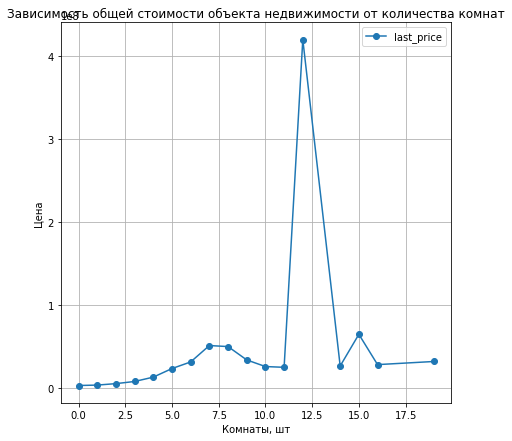

In [102]:
#Покажем график зависимости общей стоимости объекта от количества комнат
(
    df.pivot_table(index='rooms', values='last_price')
    .plot(grid=True, style='o-', figsize=(7, 7))
)
plt.title('Зависимость общей стоимости объекта недвижимости от количества комнат')
plt.xlabel('Комнаты, шт')
plt.ylabel('Цена')
plt.show()

In [103]:
#расчитаем коэффициент корреляции между количеством комнат и стоимостью объектов недвижимости
df['rooms'].corr(df['last_price'])

0.3633428499648948

*Количество комнат от 0 до 7 шт. напрямую влияют на стоимость объектов недвижимости, т.е. чем больше число комнат, тем выше цена. Количетво комнат больше 7 не отражает прямой зависимости на цену квартир*

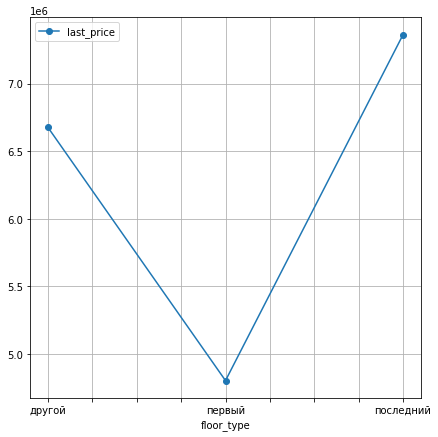

In [104]:
#построим график зависимости между общей стоиостью недвижимости и типом этажа
(
    df.pivot_table(index='floor_type', values='last_price')
    .plot(grid=True, style='o-', figsize=(7, 7))
)
plt.show()

*Как видно из последнего графика, этажность влияет на общую стоимость квартир: крайние этажи стоят дешевле.*

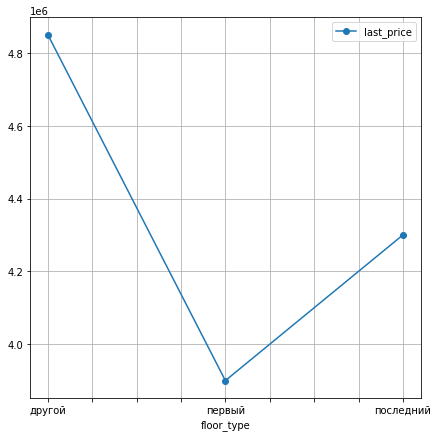

In [105]:
(
    df.pivot_table(index='floor_type', values='last_price', aggfunc='median')
    .plot(grid=True, style='o-', figsize=(7, 7))
)
plt.show()

*Сгруппированные по медиане данные отражают реальную картину, на которую не влияют выбросы: цена квартир на крайние этажи меньше, чем на остальные, причем первый этаж стоит дешевле всех*

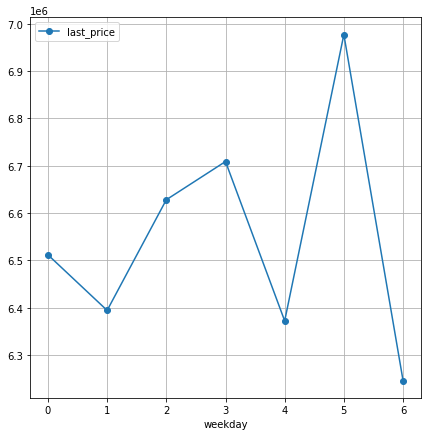

In [106]:
#построим график зависимости между общей стоимостью недвижимости и днем недели размещения объявления
(
    df.pivot_table(index='weekday', values='last_price')
    .plot(grid=True, style='o-', figsize=(7, 7))
)
plt.show()

In [107]:
# Посмотрим кол-во объявлений по каждому дню недели
df['weekday'].value_counts().sort_values()

6    1699
5    1936
0    3612
2    3974
4    4000
1    4183
3    4295
Name: weekday, dtype: int64

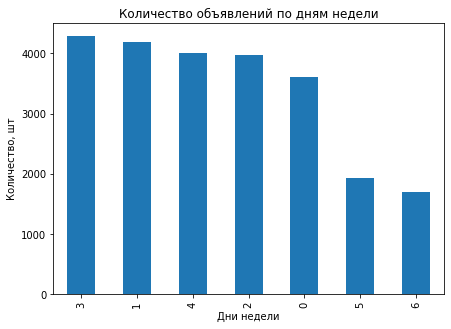

In [108]:
#построим график, отражающий количество объявлений по дням недели
df['weekday'].value_counts().plot.bar(figsize=(7, 5))
plt.xlabel('Дни недели')
plt.ylabel('Количество, шт')
plt.title('Количество объявлений по дням недели')
plt.show()

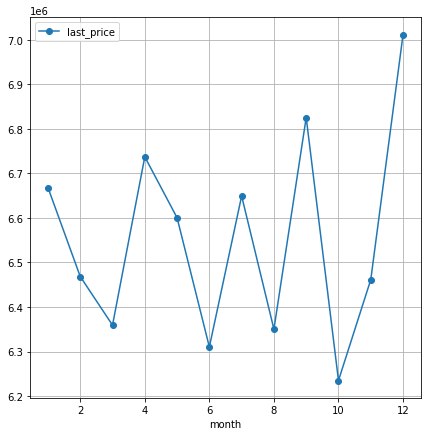

In [109]:
#построим график зависимости между общей стоимостью недвижимости и месяцем размещения объявления
(
    df.pivot_table(index='month', values='last_price')
    .plot(grid=True, style='o-', figsize=(7, 7))
)
plt.show()

In [110]:
# Посмотрим кол-во объявлений по каждому месяцу
df['month'].value_counts().sort_values()

5     1274
1     1500
12    1641
7     1695
8     1744
6     1760
9     1981
10    2127
11    2371
4     2379
3     2587
2     2640
Name: month, dtype: int64

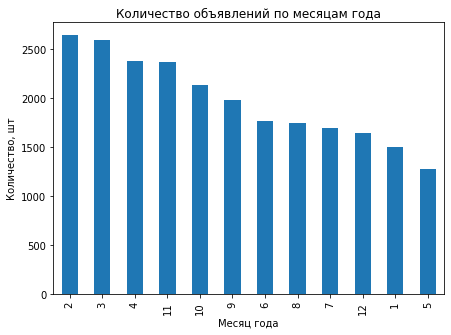

In [111]:
#построим график, отражающий количество объявлений по месяцам года
df['month'].value_counts().plot.bar(figsize=(7, 5))
plt.xlabel('Месяц года')
plt.ylabel('Количество, шт')
plt.title('Количество объявлений по месяцам года')
plt.show()

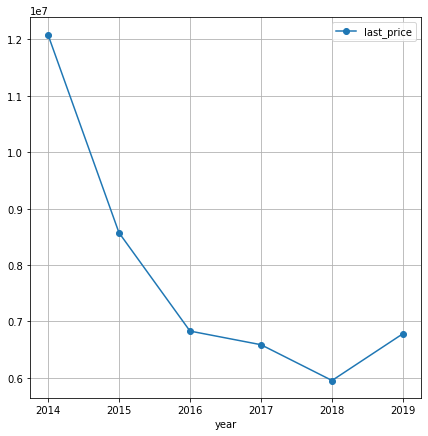

In [112]:
#построим график зависимости между общей стоимостью недвижимости и годом размещения объявления
(
    df.pivot_table(index='year', values='last_price')
    .plot(grid=True, style='o-', figsize=(7, 7))
)
plt.show()

In [113]:
# Посмотрим кол-во объявлений по каждому году
df['year'].value_counts().sort_values()

2014     137
2015    1191
2016    2783
2019    2879
2017    8190
2018    8519
Name: year, dtype: int64

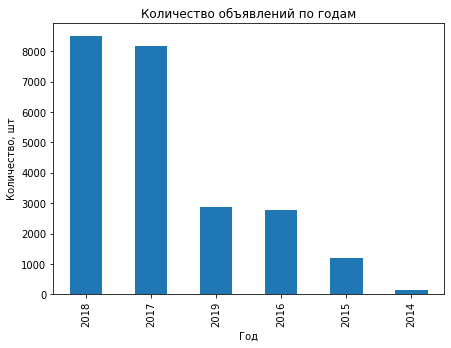

In [114]:
#построим график, отражающий количество объявлений по годам
df['year'].value_counts().plot.bar(figsize=(7, 5))
plt.xlabel('Год')
plt.ylabel('Количество, шт')
plt.title('Количество объявлений по годам')
plt.show()

*Зависимость между общей стоимостью объекта недвижимости и датами размещения не прослеживается. Можно отметить, что будние дни размещеатся объявлений больше, чем в выходные, возможно это связано с работой агенств недвижимости. Больше всего объявлений было размещено в 2017-2018 годах *

**Таким образом можно сделать вывод, что больше всего на общую (полную) стоимость квартир влияет общая площадь объектов недвижимости, на втором месте показатель жилой площади. Соотвественно и количество комнат, по определению являющиеся жилыми помещениями, имеет прямую линейную зависимость с ценой квартир. Совсем не влияют на стоимость день и месяц размещения объявлений**

*Посчитаем среднюю цену одного квадратного метра в 10 населенных пунктах с наибольшим числом объявлений*

In [115]:
#выведем сводную таблицу с количеством объявлений и средней ценой квадратного метра
df.pivot_table(index='locality_name', values='price_one_qm', aggfunc=('mean','count')).sort_values(by=('count'), ascending=False).round(2).head(10)

,count,mean
locality_name,,
санкт-петербург,15721,114849.01
поселок мурино,556,85681.76
поселок шушары,440,78677.36
всеволожск,398,68654.47
пушкин,369,103125.82
колпино,338,75424.58
поселок парголово,327,90175.91
гатчина,307,68746.15
деревня кудрово,299,92473.55


In [116]:
df.pivot_table(index='locality_name', values='price_one_qm', aggfunc=('median','count')).sort_values(by=('count'), ascending=False).round(2).head(10)

,count,median
locality_name,,
санкт-петербург,15721,104761.90
поселок мурино,556,85878.46
поселок шушары,440,76876.18
всеволожск,398,65789.47
пушкин,369,100000.00
колпино,338,74723.74
поселок парголово,327,91642.86
гатчина,307,67796.61
деревня кудрово,299,91860.47


In [117]:
#Найдем населенный пункт с самой высокой стоимостью за 1 кв.м.
df.pivot_table(index='locality_name', values='price_one_qm', aggfunc=('median','count')).sort_values(by=('median'), ascending=False).round(2).head(1)

,count,median
locality_name,,
санкт-петербург,15721,104761.9


In [118]:
#Найдем населенный пункт с самой низкой стоимостью за 1 кв.м.
df.pivot_table(index='locality_name', values='price_one_qm', aggfunc=('median','count')).sort_values(by=('median'), ascending=False).round(2).tail(1)

,count,median
locality_name,,
деревня старополье,3,11000.0


**Наибольшее количество объявлений размещено в городе Санкт-Петербург, населенный пункт с самой высокой стоимостью за 1 кв. м - это Санкт- Петербург, с самой низкой - деревня Старополье**

*Проверим, как стоимость объектов недвижимости в Санкт-Петербурге зависит от расстояния до центра города*

In [119]:
#рассмотрим основные характеристики
df.query('locality_name == "санкт-петербург"')['city_centers_nearest_km'].describe()

count    15660.000000
mean        11.596041
std          4.863594
min          0.000000
25%          8.000000
50%         12.000000
75%         15.000000
max         29.000000
Name: city_centers_nearest_km, dtype: float64

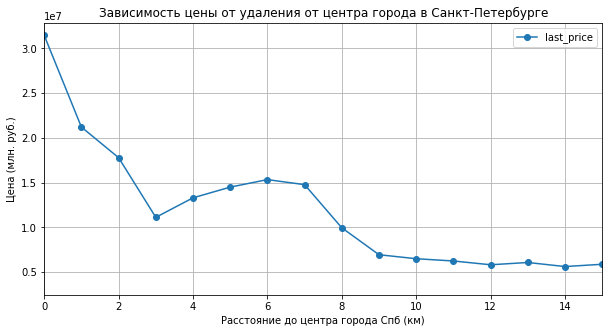

In [120]:
#построим график
df.query('locality_name== "санкт-петербург"').pivot_table(index='city_centers_nearest_km', values='last_price').plot(xlim=(0,15), grid=True, style='o-', figsize=(10, 5))
plt.xlabel('Расстояние до центра города Спб (км)')
plt.ylabel('Цена (млн. руб.)')
plt.title('Зависимость цены от удаления от центра города в Санкт-Петербурге')
plt.show()

In [121]:
#выведем сводную таблицу для каждого километра расстояния в пределах 15 км. зоны
df.query('locality_name== "санкт-петербург" and city_centers_nearest_km <15').pivot_table(index='city_centers_nearest_km', values='last_price', aggfunc='mean')

,last_price
city_centers_nearest_km,
0.0,3.144912e+07
1.0,2.120672e+07
2.0,1.778832e+07
3.0,1.112658e+07
4.0,1.330428e+07
5.0,1.449912e+07
6.0,1.533842e+07
7.0,1.477515e+07
8.0,9.957717e+06


**Очевидно, что стоимость объектов недвижимости в центре города Санкт-Петербург намного выше, чем на окраинах. С увеличением расстояния от центра цены на квартиры значительно снижаются. Но за границей 10 км. цена уже не зависит от расстояния до центра города**

### Общий вывод

В данном исследовании был изучен архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет.  
По результатам проведенной работы можно сделать выводы: 
- в исходных данных содержались пропуски, аномалии, некорректные наименования столбцов, неявные дубликаты, ошибки в определении типов столбцов, которые потребовали провести предобработку данных;
- после предобработки данных и для дальнейшего анализа потребовалось добавление новых столбцов (например цена 1 кв.м., тип этажа квартиры и пр.);
- проведен исследовательский анализ данных.

Изученные параметры характеризуют среднестатистическую квартиру на рынке недвижимости - это квартира с общей площадью около 52 м. кв., жилой площадью около 30 м. кв., площадью кухни около 6 м. кв., ценой - 4,56 млн. руб., с 1 или 2 комнатами, высотой потолка - 2,65 м., расположенная в пятиэтажном доме и не на крайнем этаже, удаленная от центра города примерно на 14,5 км. Описание данного объекста недвижимости подходит под стандартные панельные квартиры советской постройки.

Длительность размещения объявлений показала, что в основном квартиры продаются в течение 108 дней. Быстрыми продажами можно считать квартиры, проданные за срок менее 42 дней, необычно долгими продажами можно назвать объявления, которые были размещены более чем на 249 дней.

Из всех изученных факторов больше всего на стоимость объекта недвижимости влияет общая площадь, взаимосвязь  - линейная.
Квартиры расположенные на крайних этажах стоят намного дешевле остальных.

Самая дорогая стоимость 1 квадратного по городу Санкт-Петербург.Больше всего объявлений размещено также в городе Санкт-Петербург.

Относительно исследования объявлений только по городу Санкт-Петербург - цена на жилье в радиусе 7-8 км. зависит от расстояния до центра - чем ближе к центру, тем дороже стоимость.